<a href="https://colab.research.google.com/github/luke8089/Scientific-Computing-Project/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies (uncomment if not installed)
# !pip install pandas matplotlib seaborn statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf



In [ ]:
url = "http://faculty.ucr.edu/~jflegal/206/gmp.dat"

# Try reading without column names to inspect
# Use delim_whitespace=True and handle bad lines
gmp_preview = pd.read_csv(url, delim_whitespace=True, header=None, engine='python', on_bad_lines='warn')
print(gmp_preview.head())
print(f"Shape: {gmp_preview.shape}")

<ipython-input-4-598402954>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  gmp_preview = pd.read_csv(url, delim_whitespace=True, header=None, engine='python', on_bad_lines='warn')


       0      1        2
0  "MSA"  "gmp"  "pcgmp"
Shape: (1, 3)


<ipython-input-4-598402954>:5: ParserWarning: Skipping line 2: Expected 3 fields in line 2, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

  gmp_preview = pd.read_csv(url, delim_whitespace=True, header=None, engine='python', on_bad_lines='warn')
<ipython-input-4-598402954>:5: ParserWarning: Skipping line 3: Expected 3 fields in line 3, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

  gmp_preview = pd.read_csv(url, delim_whitespace=True, header=None, engine='python', on_bad_lines='warn')
<ipython-input-4-598402954>:5: ParserWarning: Skipping line 4: Expected 3 fields in line 4, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.

  gmp_preview = pd.read_csv(url, delim_whitespace=True, header=None, engine='python', on_bad_lines='warn')
<ipython-input-4-598402954>:5: ParserWarning: Skipping line 5: Expected 3 fields in line 5, saw 5. Error could p

In [ ]:
# Keep first 3 columns and assign names
gmp = gmp_preview.iloc[:, :3]
gmp.columns = ["MSA", "gmp", "pcgmp"]

# Convert 'gmp' and 'pcgmp' columns to numeric, coercing errors to NaN
gmp["gmp"] = pd.to_numeric(gmp["gmp"], errors='coerce')
gmp["pcgmp"] = pd.to_numeric(gmp["pcgmp"], errors='coerce')

# Handle potential NaN values after conversion if necessary
# For example, you could fill NaNs with 0 or drop rows with NaNs
# gmp = gmp.fillna(0) # Example: fill with 0
# gmp = gmp.dropna() # Example: drop rows with NaNs

# Compute population
# Make sure there are no NaNs in 'gmp' or 'pcgmp' before dividing if you didn't handle them above
gmp["pop"] = (gmp["gmp"] / gmp["pcgmp"]).round()

# Save as pickle (like R's save())
gmp.to_pickle("gmp.pkl")

# Reload to confirm
gmp_loaded = pd.read_pickle("gmp.pkl")
gmp_loaded.head()

,MSA,gmp,pcgmp,pop
0,"""MSA""",NaN,NaN,NaN


In [ ]:
import statsmodels.api as sm

birthwt = sm.datasets.get_rdataset("birthwt", "MASS").data

# Rename columns
birthwt.columns = [
    "birthwt_below_2500", "mother_age", "mother_weight", "race",
    "mother_smokes", "previous_prem_labor", "hypertension",
    "uterine_irr", "physician_visits", "birthwt_grams"
]

# Recode factors
birthwt["race"] = birthwt["race"].replace({1: "white", 2: "black", 3: "other"})
birthwt["mother_smokes"] = birthwt["mother_smokes"].map({0: "No", 1: "Yes"})
birthwt["uterine_irr"] = birthwt["uterine_irr"].map({0: "No", 1: "Yes"})
birthwt["hypertension"] = birthwt["hypertension"].map({0: "No", 1: "Yes"})

birthwt.head()


,birthwt_below_2500,mother_age,mother_weight,race,mother_smokes,previous_prem_labor,hypertension,uterine_irr,physician_visits,birthwt_grams
rownames,,,,,,,,,,
85,0,19,182,black,No,0,No,Yes,0,2523
86,0,33,155,other,No,0,No,No,3,2551
87,0,20,105,white,Yes,0,No,No,1,2557
88,0,21,108,white,Yes,0,No,Yes,2,2594
89,0,18,107,white,Yes,0,No,Yes,0,2600


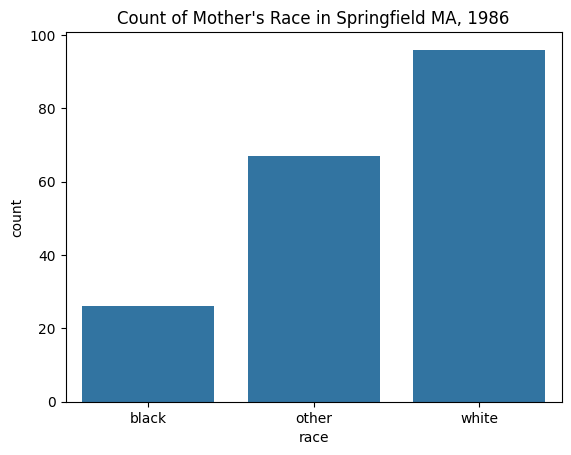

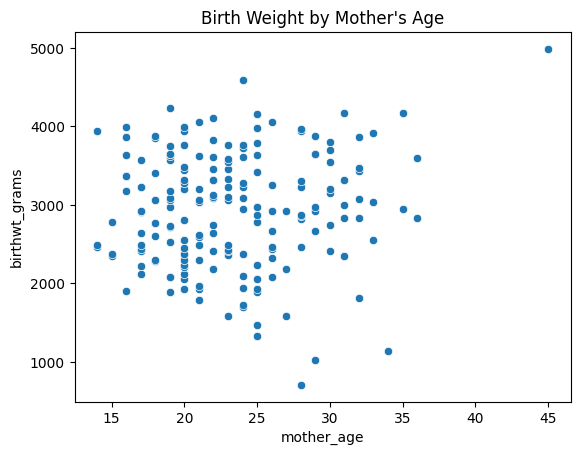

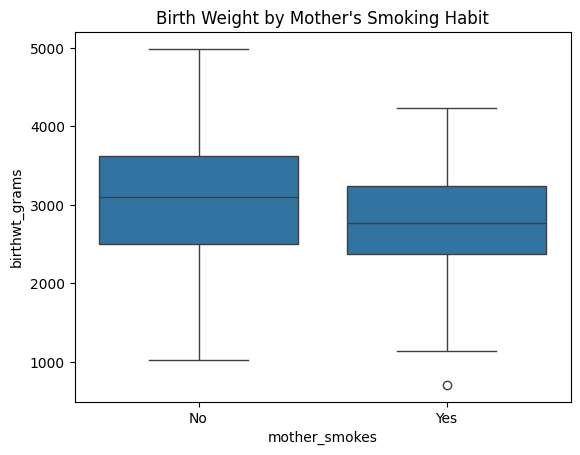

In [ ]:
# Race count
sns.countplot(x="race", data=birthwt)
plt.title("Count of Mother's Race in Springfield MA, 1986")
plt.show()

# Birth weight by age
sns.scatterplot(x="mother_age", y="birthwt_grams", data=birthwt)
plt.title("Birth Weight by Mother's Age")
plt.show()

# Birth weight by smoking
sns.boxplot(x="mother_smokes", y="birthwt_grams", data=birthwt)
plt.title("Birth Weight by Mother's Smoking Habit")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

smokers = birthwt[birthwt["mother_smokes"] == "Yes"]["birthwt_grams"]
nonsmokers = birthwt[birthwt["mother_smokes"] == "No"]["birthwt_grams"]

ttest_res = ttest_ind(smokers, nonsmokers, equal_var=False)
print(ttest_res)


TtestResult(statistic=np.float64(-2.7298856759879087), pvalue=np.float64(0.0070025481730769555), df=np.float64(170.10024146854795))


In [ ]:
# Linear model 1: smoking
lm1 = smf.ols("birthwt_grams ~ mother_smokes", data=birthwt).fit()
print(lm1.summary())

# Linear model 2: age
lm2 = smf.ols("birthwt_grams ~ mother_age", data=birthwt).fit()
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:          birthwt_grams   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     7.038
Date:                Tue, 17 Jun 2025   Prob (F-statistic):            0.00867
Time:                        18:42:49   Log-Likelihood:                -1510.1
No. Observations:                 189   AIC:                             3024.
Df Residuals:                     187   BIC:                             3031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             3055.6957 

In [ ]:
birthwt_noout = birthwt[birthwt["mother_age"] <= 40]

lm3 = smf.ols("birthwt_grams ~ mother_age", data=birthwt_noout).fit()
print(lm3.summary())

lm3a = smf.ols("birthwt_grams ~ mother_smokes + mother_age", data=birthwt_noout).fit()
print(lm3a.summary())


                            OLS Regression Results                            
Dep. Variable:          birthwt_grams   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.1761
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.675
Time:                        18:43:26   Log-Likelihood:                -1501.9
No. Observations:                 188   AIC:                             3008.
Df Residuals:                     186   BIC:                             3014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2833.2735    244.954     11.567      0.0

In [ ]:
lm3b = smf.ols("birthwt_grams ~ mother_age + mother_smokes * race", data=birthwt_noout).fit()
print(lm3b.summary())

lm4 = smf.ols("birthwt_grams ~ mother_age + mother_weight + race + mother_smokes + previous_prem_labor + hypertension + uterine_irr + physician_visits", data=birthwt_noout).fit()
print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:          birthwt_grams   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.746
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           0.000163
Time:                        18:43:43   Log-Likelihood:                -1488.3
No. Observations:                 188   AIC:                             2991.
Df Residuals:                     181   BIC:                             3013.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

Data types of X before get_dummies:
mother_age              int64
mother_weight           int64
race                   object
mother_smokes          object
previous_prem_labor     int64
hypertension           object
uterine_irr            object
physician_visits        int64
dtype: object

Data types of X after get_dummies:
mother_age             int64
mother_weight          int64
previous_prem_labor    int64
physician_visits       int64
race_other              bool
race_white              bool
mother_smokes_Yes       bool
hypertension_Yes        bool
uterine_irr_Yes         bool
dtype: object

Data types of X_train before OLS:
mother_age             int64
mother_weight          int64
previous_prem_labor    int64
physician_visits       int64
race_other              bool
race_white              bool
mother_smokes_Yes       bool
hypertension_Yes        bool
uterine_irr_Yes         bool
dtype: object

Data types of X_train after selecting numeric columns:
mother_age             int64
moth

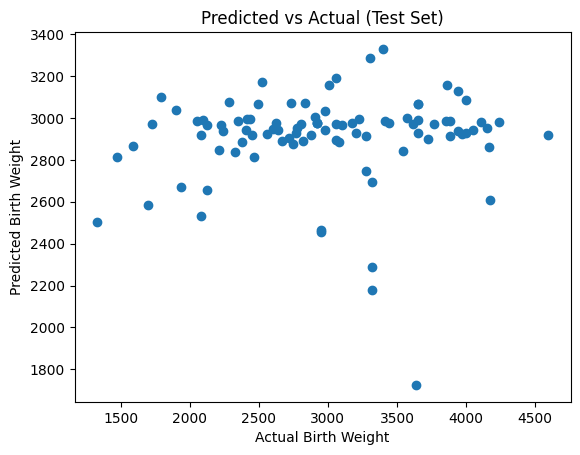

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming birthwt_noout is already defined from previous steps

X = birthwt_noout.drop(columns=["birthwt_grams", "birthwt_below_2500"])

# --- Check and handle object dtypes before get_dummies ---
# It's good practice to ensure only relevant columns are kept before dummy encoding.
# Let's check the dtypes of X before get_dummies
print("Data types of X before get_dummies:")
print(X.dtypes)

# If you find any unexpected 'object' columns that should be numeric but aren't,
# investigate their values (e.g., print unique values or use .value_counts())
# and try converting them or handling non-numeric entries.
# Example: If 'some_column' was object but should be numeric
# X['some_column'] = pd.to_numeric(X['some_column'], errors='coerce')
# Then handle NaNs introduced by coercion if necessary (e.g., fillna, dropna)

# --- Apply get_dummies ---
X = pd.get_dummies(X, drop_first=True)

# --- Verify dtypes after get_dummies ---
# After get_dummies, all columns should ideally be numeric (int or float).
print("\nData types of X after get_dummies:")
print(X.dtypes)
# If you still see 'object' columns here, it means get_dummies didn't process them
# because they were likely already object and not recognized as categorical by pandas,
# or they contain mixed types that prevented conversion.

y = birthwt_noout["birthwt_grams"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# --- Check dtypes of training data before passing to OLS ---
print("\nData types of X_train before OLS:")
print(X_train.dtypes)
# Ensure all columns are numeric here (e.g., float64, uint8 from get_dummies)

# Filter X_train to include only numeric columns
X_train_numeric = X_train.select_dtypes(include=np.number)
print("\nData types of X_train after selecting numeric columns:")
print(X_train_numeric.dtypes)

# Fit OLS model using the numeric columns
# The error should be resolved if X_train_numeric contains only numeric dtypes
lm_half = sm.OLS(y_train, sm.add_constant(X_train_numeric, has_constant='add')).fit()
print(lm_half.summary())

# Predictions
# Make sure X_test also contains only numeric columns and has the same columns as X_train_numeric
# Select the same columns from X_test as were used for training
X_test_numeric = X_test[X_train_numeric.columns]

train_pred = lm_half.predict(sm.add_constant(X_train_numeric, has_constant='add'))
test_pred = lm_half.predict(sm.add_constant(X_test_numeric, has_constant='add'))


print("Train correlation:", np.corrcoef(y_train, train_pred)[0,1])
print("Test correlation:", np.corrcoef(y_test, test_pred)[0,1])

plt.scatter(y_test, test_pred)
plt.xlabel("Actual Birth Weight")
plt.ylabel("Predicted Birth Weight")
plt.title("Predicted vs Actual (Test Set)")
plt.show()